Plotting the number of counts in each boxplot. http://stackoverflow.com/questions/29286217/is-there-a-good-way-to-display-sample-size-on-grouped-boxplots-using-python-matp 

[11, 50, 39]
100.0
3


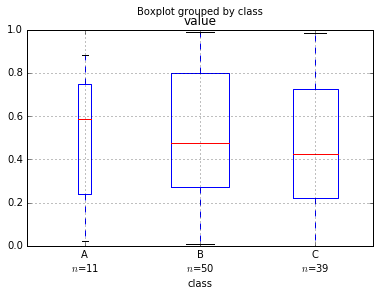

In [49]:
import pandas as pd

from numpy.random import rand, randint

# Had to include these two lines for plot to print in notebook! 
import matplotlib.pyplot as plt 
%matplotlib inline

# Make 100 random numbers, no larger than 1. Place them in a column named value
df = pd.DataFrame(rand(100,1),columns = ['value'])


cut1 = randint(2,47) # create a random int between 2 and 47
cut2 = randint(52,97) # random integer between 52 amd 97

# A is always less than B, B less than C
# ix is the most general indexer which supports loc,iloc and ix. 
# Good for dealing with mixed positional and label-based indexes.
# When an axis is integer only, best to use iloc or loc

df.ix[:cut1, 'class'] = 'A'  # if the index is up to cut 1, assign a value A and put it in column='class'
df.ix[cut1+1:cut2, 'class']='B'
df.ix[cut2+1:, 'class'] = 'C'

#Put into groups A, B, C for further working
dfg = df.groupby('class')

counts = [len(v) for k,v in dfg] # k is the key for the group, v is a dataframe describing the values.
total = float(sum(counts)) # 
cases = len(counts)

print counts # the number of values in each group A, B and C.
print total # Adding the values and making it a float
print cases # How many groups are there?

# For each group count (stored as a list in counts), divide by the total
# Widths counts/100. 
widths = [c/total for c in counts]

# Very clever using the number of counts to give the box width!!
# cax is an AxesSubplot object.
cax = df.boxplot(column = 'value', by='class', widths=widths) # widths is a matplotlib keyword, fine here though!

cax.set_xticklabels(['%s\n$n$=%d'%(k, len(v)) for k,v in dfg]) # set_xticklabels is applied to an axes object.
# http://matplotlib.org/api/axes_api.html 

# %s = k and %d = len(v)

# len(v)) for k,v in dfg = this is the key to looping over the groupby objects, exploring each group. k is the group name
# and v is in informatio in that group